# CAPSTONE PROJECT

## CASE 2: RESTAURANT RECOMMENDATION

## **Judul Capstone Project: Simulasi Analisis Deskriptif Big Data dan Rekomendasinya Pada Perusahaan Restoran (Sebuah Studi Kasus dari Aspek Segmentasi Pasar, Mode Pembayaran, dan Strategi *Procurement*)**

###Nama Penyusun: Fikri Irfan Adristi

## Connect Colab to GDrive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## IMPORT PACKAGES

In [2]:
# Import packages os, pandas, dan numpy untuk manajemen serta analisis data
import os
import pandas as pd
import numpy as np


# Library untuk visualisasi
import matplotlib.pyplot as plt

#import SQLite library
import sqlite3

## Connect SQLite to Python

In [3]:
# Mendefinisikan path dan data sesuai folder GDrive dimana file dataset penyusun project disimpan
path = '/content/gdrive/MyDrive/Narasio/Meet 12 - Capstone Project/Dataset Capstone Project '
dataset = '/content/gdrive/MyDrive/Narasio/Meet 12 - Capstone Project/Dataset Capstone Project /Restaurant_Dataset.db'

## Data Preparation Using SQL

In [4]:
# Cek isi direktori file
os.listdir(path)

['Restaurant_Dataset.db']

In [5]:
# Kemudian membuat connection ke database yang ada
conn = sqlite3.connect(dataset)

# Membuat cursor object untuk memanggil SQL statement
cur = conn.cursor()

In [6]:
# Lalu penyusun project melakukan execute SQL statement. Pada tahapan ini penyusun akan mengecek tabel apa saja yang terdapat di Restaurant_Dataset.db
cur.execute("""
              SELECT 
                  name 
              FROM sqlite_master 
              WHERE type='table'
            """)

print(cur.fetchall())

[('Orders',), ('Customers',), ('Vendors',), ('Locations',)]


In [7]:
# Mendapatkan data Orders
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Orders
                  """, conn)

,order_id,customer_id,item_count,grand_total,payment_mode,is_favorite,is_rated,driver_rating,deliverydistance,vendor_id,created_at,LOCATION_NUMBER
0,163241.0,9ZTJB1L,2.0,14.4,1,Yes,No,0.0,0.00,83,2019-08-01 05:31:33,0
1,163246.0,6C7D1O2,3.0,18.2,2,Yes,No,0.0,0.00,83,2019-08-01 05:37:05,0
2,163265.0,VCBBSUB,1.0,4.6,1,Yes,No,0.0,0.00,78,2019-08-01 06:03:59,0
3,163274.0,ZBNP36W,1.0,5.7,1,Yes,No,0.0,0.00,195,2019-08-01 06:34:38,0
4,163321.0,BJ1GYQY,2.0,15.8,1,Yes,No,0.0,0.00,75,2019-08-01 17:06:17,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9763,415158.0,68KNG50,2.0,28.1,1,No,No,0.0,12.03,356,2020-02-29 22:17:02,0
9764,415165.0,E4G7O87,1.0,5.4,2,No,No,0.0,6.88,401,2020-02-29 22:17:22,0
9765,415198.0,BAOSFJQ,1.0,5.4,4,No,No,0.0,8.89,160,2020-02-29 22:23:59,0
9766,415310.0,89BFAER,4.0,16.9,2,No,No,0.0,4.82,79,2020-02-29 22:45:28,2


In [8]:
# Mendapatkan data Customers
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Customers
                  """, conn)

,customer_id,gender,dob,status,verified,created_at,updated_at
0,ICE2DJP,male,2006,1,1,2018-02-07 16:45:36,2018-02-07 16:45:36
1,FWNUI71,male,2007,1,1,2018-03-22 20:11:47,2018-03-22 20:11:47
2,LRX7BCH,male,1992,1,1,2018-04-17 20:01:15,2018-04-17 20:01:15
3,D96DHMD,male,1999,1,1,2018-04-29 22:35:52,2018-04-29 22:35:52
4,88Q8Y5V,male,1997,1,1,2018-05-05 12:38:09,2018-05-05 12:38:09
...,...,...,...,...,...,...,...
9763,369I4YD,female,2002,1,1,2020-03-03 12:03:03,2020-03-03 12:03:16
9764,VUOXW5K,female,1991,1,1,2020-03-03 12:17:09,2020-03-03 14:04:41
9765,H1S2T2Y,female,2001,1,1,2020-03-03 12:23:20,2020-03-03 12:24:20
9766,QGPCD5S,female,1996,1,1,2020-03-03 13:18:23,2020-03-03 13:18:39


In [9]:
# Mendapatkan data Vendors
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Vendors
                  """, conn)

,vendor_id,authentication_id,latitude,longitude,vendor_category_en,delivery_charge,serving_distance,is_open,OpeningTime,prepration_time,discount_percentage,status,verified,rank,vendor_rating,vendor_tag,vendor_tag_name,created_at,updated_at,device_type
0,4,118597.0,-0.588596,0.754434,Restaurants,0.0,6.0,1.0,11:00AM-11:30PM,15,0.0,1.0,1,11,4.4,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",2018-01-30 14:42:04,2020-04-07 15:12:43,3
1,13,118608.0,-0.471654,0.744470,Restaurants,0.7,5.0,1.0,08:30AM-10:30PM,14,0.0,1.0,1,11,4.7,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",2018-05-03 12:32:06,2020-04-05 20:46:03,3
2,20,118616.0,-0.407527,0.643681,Restaurants,0.0,8.0,1.0,08:00AM-10:45PM,19,0.0,1.0,1,1,4.5,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",2018-05-04 22:28:22,2020-04-07 16:35:55,3
3,23,118619.0,-0.585385,0.753811,Restaurants,0.0,5.0,1.0,10:59AM-10:30PM,16,0.0,1.0,1,11,4.5,"5,8,30,24","Burgers,Desserts,Fries,Salads",2018-05-06 19:20:48,2020-04-02 00:56:17,3
4,28,118624.0,0.480602,0.552850,Restaurants,0.7,15.0,1.0,11:00AM-11:45PM,10,0.0,1.0,1,11,4.4,5,Burgers,2018-05-17 22:12:38,2020-04-05 15:57:41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,849,130455.0,-1.588060,-0.066441,Restaurants,0.0,10.0,1.0,None,10,0.0,1.0,1,1,4.1,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",2019-12-21 12:47:39,2020-04-07 20:01:33,3
96,855,130463.0,2.145206,0.745025,Restaurants,0.0,8.0,1.0,None,10,0.0,1.0,1,1,4.2,"1,5,8,91,30,48,24","American,Burgers,Desserts,Free Delivery,Fries,...",2019-12-21 13:02:32,2020-04-07 01:50:41,3
97,856,130464.0,0.251469,0.483632,Restaurants,0.0,7.0,1.0,None,10,0.0,1.0,1,11,4.3,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",2019-12-21 13:04:34,2020-04-06 23:53:16,3
98,858,130468.0,0.019817,0.587087,Restaurants,0.0,3.0,1.0,None,10,0.0,1.0,1,11,4.2,"1,4,5,6,8,91,30,43,48,24","American,Breakfast,Burgers,Cafe,Desserts,Free ...",2019-12-21 13:12:09,2020-04-07 14:26:08,3


In [11]:
# Mendapatkan data Locations
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Locations
                  """, conn)

,customer_id,location_number,latitude,longitude
0,QINKB6H,0,126.032278,-9.106019
1,EQ4S6SE,0,0.278709,-78.623847
2,4673534,1,0.124485,-78.605621
3,OQA6IMF,2,-0.113891,-78.577449
4,9NQE2MO,3,-0.848796,0.136726
...,...,...,...,...
16715,X6XDZT9,4,-0.197722,0.609199
16716,QAPWL29,5,-0.343042,0.626064
16717,PTQBI4B,0,-0.974907,-0.177863
16718,F3678MD,0,1.058539,0.001628


## PROBLEM STATEMENT

#### 1.Bagaimana Analisis Deskriptif Segmentasi Pasar Demogafis dari Responden di Restoran ini?

#### 2.Bagaimana Analisis Deskriptif Mode Pembayaran pada Restoran ini?

#### 3.Strategi *Procurement* Apa yang Dapat Diimplementasikan pada Restoran ini?

## LITERATURE REVIEW

#### 1. Segmentasi Demografis

Menurut Kotler dan Keller (2016) salah satu alasan variabel demografis seperti usia, ukuran keluarga, siklus hidup keluarga, jenis kelamin, pendapatan, pekerjaan, pendidikan, agama, ras, generasi, kebangsaan, dan kelas sosial begitu populer di kalangan *marketers* adalah karena mereka sering dikaitkan dengan kebutuhan konsumen dan ingin. Alasan lainnya adalah bahwa variabel demografis juga mudah diukur. Bahkan ketika *marketers* menggambarkan pasar sasaran dalam istilah nondemografis (misalnya, menurut tipe kepribadian), *marketers* mungkin memerlukan *link* kembali ke karakteristik demografis untuk memperkirakan ukuran pasar dan media yang harus kita gunakan untuk menjangkaunya secara efisien.

Menurut Wijaya dan Chandra (2006) memberikan definisi operasional variabel segmentasi demografis untuk posisi pasar pada restoran *steak* dan *grill* di surabaya sebagai segmentasi yang membagi pasar menjadi berbagai kelompok berdasarkan variabel seperti usia, jenis kelamin, jumlah anggota keluarga, pendapatan per bulan, pekerjaan, dan pendidikan terakhir.

#### 2. Metode Pembayaran
Menurut Kotler dan Keller (2012) pada tahap evaluasi produk/jasa, konsumen membentuk preferensi di antara merek-merek dalam kumpulan pilihan dan mungkin juga membentuk niat untuk membeli merek yang paling disukai. Dalam melaksanakan niat pembelian, konsumen dapat membuat hingga lima subkeputusan misalnya seperti: merek (merek A), dealer (dealer 2), kuantitas (satu komputer), waktu (akhir pekan), dan metode pembayaran (kartu kredit).

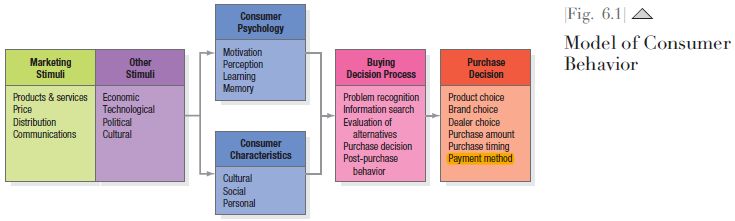

Sumber: Kotler dan Keller (2012)

#### 3. *Kraljic’s Procurement Portfolio Approach*

Model Pembelian Portofolio Kraljic dibuat oleh Peter Kraljic dan pertama kali muncul di Harvard Business Review pada tahun 1983. Terlepas dari usianya, model ini populer dan berguna yang digunakan di perusahaan-perusahaan di seluruh dunia.  Tujuannya adalah untuk membantu pembeli memaksimalkan keamanan stok persediaan dan mengurangi biaya, dengan memaksimalkan daya beli mereka. Dengan demikian, pengadaan bergerak dari aktivitas transaksional menjadi aktivitas strategis – karena, seperti yang dikatakan Kraljic, “pembelian harus menjadi manajemen pasokan” (Mind Tools Content Team, tanpa tanggal)

Kraljic’s Matrix membedakan strategi kedalam empat kuadran yang didasari dengan dua dimensi yang berbeda. Kedua dimensi tersebut merupakan pengaruh terhadap profit (profit impact) dan resiko pasok (supply risk). Keempat kuadran tersebut membagi karakteristik barang menjadi barang non critical, barang leverage, barang bottleneck, dan barang strategic (Adi dan Pujotomo, 2017).

### **Gambar Kraljic’s Portfolio Purchasing Model**
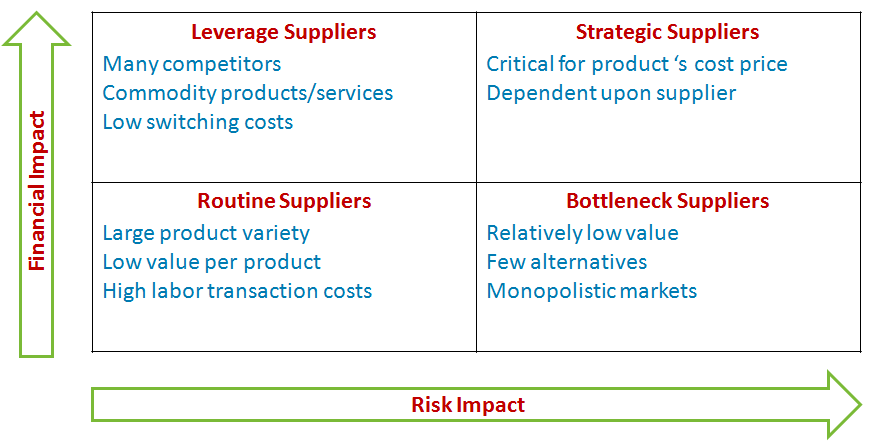

Sumber: Schmidt (tanpa tanggal a)

## DATA ANALYSIS METHOD

Metode analisis data pada *capstone project* ini dilakukan dengan tahapan sebagai berikut:

A. Data yang dianalisis dan proses cleansing data

Data yang diexploratory untuk menjawab keseluruhan *problem statement* pada *capstone project* hanyalah data pada kolom dob, gender, payment_mode, dan delivery_charge yang berasal dari tabel Customers, Orders, dan Vendor, Tabel Locations tidak digunakan dan tidak diexploratory. Pada keseluruhan tabel di Restaurant_Dataset.db juga dilakukan beberapa proses data cleansing berupa:
- Cek Tipe Data Secara Terpisah
- Cek Tipe Data, Cek *Missing Value*, dan Menghitung Rasio *Missing Value* Secara Simultan
- Cek *Duplicate*

B. Metode analisis data untuk menjawab *problem statement* pertama

Metode analisis data yang dilakukan untuk menjawab *problem statement* pertama adalah dengan:
- Mencari sebaran usia *customer* secara keseluruhan untuk mengetahu usia tertua dan termuda *customer* restoran ini dengan menggunakan fungsi utama COUNT dan GROUP BY. 
- Melakukan pengelompokan data dob dan membuat interval generasi dimana: (1) Generasi *Baby Boomber* yang lahir di tahun 1946-1964, (2) Generasi X yang lahir di tahun 1965-1976, (3) Generasi *Millenial* yang lahir di tahun 1977-1995, dan (4) Generasi Z yang lahir di tahun 1996-2010 dengan menggunakan fungsi utama COUNT, GROUP BY, dan WHERE.
- Setelah dilakukan *count* pada data dob dan membuat interval generasi lalu, data tersebut dibuatkan data frame pandas dan visualisasi pie chartnya menggunkan matplotlib untuk mengetahui persentase sebaran interval segmentasi generasi *customer* di Restoran ini. 
- Mencari sebaran data gender *customer* secara keseluruhan dengan menggunakan fungsi COUNT dan GROUP BY.
- Setelah dicari sebaran data gender *customer* secara keseluruhan, data tersebut dibuatkan data frame pandas dan visualisasi pie chartnya menggunkan matplotlib untuk mengetahui persentase sebaran segmentasi gender *customer* di Restoran ini. 

C. Metode analisis data untuk menjawab *problem statement* kedua

Metode analisis data yang dilakukan untuk menjawab *problem statement* kedua adalah dengan:
- Mencari sebaran data payment_mode secara keseluruhan dengan menggunakan fungsi utama COUNT dan GROUP BY.
- Setelah dicari sebaran data payment_mode secara keseluruhan, data tersebut dibuatkan data frame pandas dan visualisasi pie chartnya menggunkan matplotlib untuk mengetahui persentase sebaran data payment_mode di Restoran ini. 

D. Metode analisis data untuk menjawab *problem statement* ketiga

Metode analisis data yang dilakukan untuk menjawab *problem statement* ketiga adalah dengan:
- Mencari sebaran data delivery_charge secara keseluruhan.
- Setelah dicari sebaran data delivery_charge secara keseluruhan, data tersebut dibuatkan data frame pandas dan visualisasi pie chartnya menggunkan matplotlib untuk mengetahui persentase sebaran data biaya pengiriman Vendor di Restoran ini. 

## DATA CLEANSING

### Cek Tipe Data Secara Terpisah

In [12]:
# Cek tipe data pada tabel Orders
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Orders
                  """, conn).dtypes

order_id            float64
customer_id          object
item_count          float64
grand_total         float64
payment_mode          int64
is_favorite          object
is_rated             object
driver_rating       float64
deliverydistance    float64
vendor_id             int64
created_at           object
LOCATION_NUMBER       int64
dtype: object

Interpretasi: 
- Data yang akan diexploratory dari tabel ini hanyalah berasal dari kolom payment_mode.
- Dari informasi diatas diketahui bahwa tipe data pada kolom payment_mode adalah integer yang sudah tepat untuk diexploratory.

In [13]:
# Cek tipe data pada tabel Customers
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Customers
                  """, conn).dtypes

customer_id    object
gender         object
dob             int64
status          int64
verified        int64
created_at     object
updated_at     object
dtype: object

Interpretasi:
- Data yang akan diexploratory dari tabel ini hanyalah berasal dari kolom gender dan dob.
- Dari informasi diatas diketahui bahwa tipe data pada kolom gender adalah object dan tipe data pada kolom dob adalah integer yang sudah bisa untuk diexploratory.

In [14]:
# Cek tipe data pada tabel Vendors
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Vendors
                  """, conn).dtypes

vendor_id                int64
authentication_id      float64
latitude               float64
longitude              float64
vendor_category_en      object
delivery_charge        float64
serving_distance       float64
is_open                float64
OpeningTime             object
prepration_time          int64
discount_percentage    float64
status                 float64
verified                 int64
rank                     int64
vendor_rating          float64
vendor_tag              object
vendor_tag_name         object
created_at              object
updated_at              object
device_type              int64
dtype: object

Interpretasi:
- Data yang akan diexploratory dari tabel ini hanyalah berasal dari kolom delivery_charge.
- Dari informasi diatas diketahui bahwa tipe data pada kolom delivery_charge adalah float yang sudah tepat untuk diexploratory.

In [15]:
# Cek tipe data pada tabel Locations
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Locations
                  """, conn).dtypes

customer_id         object
location_number      int64
latitude           float64
longitude          float64
dtype: object

Interpretasi: Dari informasi diatas, dapat diketahui bahwa keseluruha kolom pada tabel Locations sudah tepat namun, tidak ada kolom data yang akan diexploratory dari tabel ini.

### Cek Tipe Data, Cek *Missing Value*, dan Menghitung Rasio *Missing Value* Secara Simultan

#### 1.Cek Tipe Data, Cek *Missing Value*, dan Menghitung Rasio *Missing Value* Secara Simultan Pada Tabel Orders

In [16]:
# Memunculkan informasi jumlah data dan tipe data tiap kolom dalam tabel Orders.
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Orders
                  """, conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9768 entries, 0 to 9767
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          9764 non-null   float64
 1   customer_id       9768 non-null   object 
 2   item_count        9261 non-null   float64
 3   grand_total       9768 non-null   float64
 4   payment_mode      9768 non-null   int64  
 5   is_favorite       9668 non-null   object 
 6   is_rated          9768 non-null   object 
 7   driver_rating     9768 non-null   float64
 8   deliverydistance  9768 non-null   float64
 9   vendor_id         9768 non-null   int64  
 10  created_at        9768 non-null   object 
 11  LOCATION_NUMBER   9768 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 915.9+ KB


Interpretasi: 
- Dari informasi diatas diketahui bahwa tipe data pada kolom payment_mode adalah integer yang sudah tepat untuk dianalisis lebih lanjut.
- Dari informasi diatas diketahui bahwa terdapat perbedaan jumlah data pada masing-masing kolom. Pada "Range Index" tertulis 9768 data terisi, sedangkan kolom order_id, item_count, dan is_favorite hanya memiliki jumlah data yang kurang dari 9768. Hal tersebut mengindikasikan bahwa terdapat *missing value* pada kolom order_id, item_count, dan is_favorite namun hal ini tidak menjadi masalah sebab, data yang akan diexploratory dari tabel ini hanya di kolom payment_mode.

In [17]:
# Mengecek berapa jumlah null value pada masing masing kolom dalam tabel Orders. 
jumlah_missing = pd.isnull(pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Orders
                  """, conn)).sum()
jumlah_missing

order_id              4
customer_id           0
item_count          507
grand_total           0
payment_mode          0
is_favorite         100
is_rated              0
driver_rating         0
deliverydistance      0
vendor_id             0
created_at            0
LOCATION_NUMBER       0
dtype: int64

Interpretasi: Dari informasi diatas diketahui bahwa jumlah *missing value* pada kolom order_id sebesar 4, item_count sebesar 507, dan is_favorite sebesar 100 namun hal ini tidak masalah sebab, data yang akan diexploratory dari tabel ini hanya pada kolom payment_mode yang tidak memiliki *missing value*.

In [18]:
# menghitung ratio missing value pada tabel Orders
rasio = jumlah_missing.div(len(pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Orders
                  """, conn)))
rasio

order_id            0.000410
customer_id         0.000000
item_count          0.051904
grand_total         0.000000
payment_mode        0.000000
is_favorite         0.010238
is_rated            0.000000
driver_rating       0.000000
deliverydistance    0.000000
vendor_id           0.000000
created_at          0.000000
LOCATION_NUMBER     0.000000
dtype: float64

Interpretasi: Dari informasi diatas, dapat diketahui bahwa kolom order_id, item_count, dan is_favorite memiliki rasio *missing value* < 60% sehingga, ketiga kolom tersebut tidak dihilangkan (drop) dari tabel ini.

#### 2.Cek Tipe Data, Cek *Missing Value*, dan Menghitung Rasio *Missing Value* Secara Simultan Pada Tabel Customers

In [19]:
# Memunculkan informasi jumlah data dan tipe data tiap kolom dalam tabel Customers.
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Customers
                  """, conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9768 entries, 0 to 9767
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  9768 non-null   object
 1   gender       9768 non-null   object
 2   dob          9768 non-null   int64 
 3   status       9768 non-null   int64 
 4   verified     9768 non-null   int64 
 5   created_at   9768 non-null   object
 6   updated_at   9768 non-null   object
dtypes: int64(3), object(4)
memory usage: 534.3+ KB


Interpretasi: 
- Dari informasi diatas diketahui bahwa tipe data pada kolom gender adalah object dan tipe data pada kolom dob adalah integer yang sudah bisa untuk dianalisis lebih lanjut.
- Dari informasi diatas diketahui bahwa pada "Range Index" tertulis 9768 data terisi dan seluruh kolom data pada tabel customers ini tidak ditemukan *missing value*. Data yang akan diexploratory dari tabel ini hanya di kolom gender dan dob.

In [20]:
# Mengecek berapa jumlah null value pada masing masing kolom dalam tabel Customers. 
jumlah_missing = pd.isnull(pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Customers
                  """, conn)).sum()
jumlah_missing

customer_id    0
gender         0
dob            0
status         0
verified       0
created_at     0
updated_at     0
dtype: int64

Interpretasi: Dari informasi diatas diketahui bahwa jumlah *missing value* pada seluruh kolom di tabel Customers adalah 0 namun, data yang akan dianalisis lebih lanjut hanya berasal dari kolom gender dan dob.

In [21]:
# menghitung ratio missing value pada tabel Customers
rasio = jumlah_missing.div(len(pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Customers
                  """, conn)))
rasio

customer_id    0.0
gender         0.0
dob            0.0
status         0.0
verified       0.0
created_at     0.0
updated_at     0.0
dtype: float64

Interpretasi: Dari informasi diatas diketahui bahwa rasio *missing value* pada seluruh kolom di tabel Customers adalah 0 sehingga, tidak ada kolom yang  dihilangkan (drop) dari tabel ini.

#### 3.Cek Tipe Data, Cek *Missing Value*, dan Menghitung Rasio *Missing Value* Secara Simultan Pada Tabel Vendors

In [22]:
# Memunculkan informasi jumlah data dan tipe data tiap kolom dalam tabel Vendors.
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Vendors
                  """, conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vendor_id            100 non-null    int64  
 1   authentication_id    100 non-null    float64
 2   latitude             100 non-null    float64
 3   longitude            100 non-null    float64
 4   vendor_category_en   100 non-null    object 
 5   delivery_charge      100 non-null    float64
 6   serving_distance     100 non-null    float64
 7   is_open              100 non-null    float64
 8   OpeningTime          91 non-null     object 
 9   prepration_time      100 non-null    int64  
 10  discount_percentage  100 non-null    float64
 11  status               100 non-null    float64
 12  verified             100 non-null    int64  
 13  rank                 100 non-null    int64  
 14  vendor_rating        100 non-null    float64
 15  vendor_tag           97 non-null     obje

Interpretasi: 
- Dari informasi diatas diketahui bahwa tipe data pada kolom delivery_charge adalah float yang sudah tepat untuk dianalisis lebih lanjut.
- Dari informasi diatas diketahui bahwa terdapat perbedaan jumlah data pada masing-masing kolom. Pada "Range Index" tertulis 100 data terisi, sedangkan kolom OpeningTime, vendor_tag, dan vendor_tag_name hanya memiliki jumlah data yang kurang dari 100. Hal tersebut mengindikasikan bahwa terdapat *missing value* pada kolom OpeningTime, vendor_tag, dan vendor_tag_name namun hal ini tidak menjadi masalah sebab, data yang akan diexploratory dari tabel ini hanya di kolom delivery_charge.

In [23]:
# Mengecek berapa jumlah null value pada masing masing kolom. 
jumlah_missing = pd.isnull(pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Vendors
                  """, conn)).sum()
jumlah_missing

vendor_id              0
authentication_id      0
latitude               0
longitude              0
vendor_category_en     0
delivery_charge        0
serving_distance       0
is_open                0
OpeningTime            9
prepration_time        0
discount_percentage    0
status                 0
verified               0
rank                   0
vendor_rating          0
vendor_tag             3
vendor_tag_name        3
created_at             0
updated_at             0
device_type            0
dtype: int64

Interpretasi: Dari informasi diatas diketahui bahwa jumlah *missing value* pada kolom OpeningTime sebesar 9, vendor_tag sebesar 3, dan vendor_tag_name sebesar 3 namun hal ini tidak masalah sebab, data yang akan diexploratory dari tabel ini hanya pada kolom delivery_charge yang tidak memiliki *missing value*.

In [24]:
# menghitung ratio missing value pada tabel Vendors
rasio = jumlah_missing.div(len(pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Vendors
                  """, conn)))
rasio

vendor_id              0.00
authentication_id      0.00
latitude               0.00
longitude              0.00
vendor_category_en     0.00
delivery_charge        0.00
serving_distance       0.00
is_open                0.00
OpeningTime            0.09
prepration_time        0.00
discount_percentage    0.00
status                 0.00
verified               0.00
rank                   0.00
vendor_rating          0.00
vendor_tag             0.03
vendor_tag_name        0.03
created_at             0.00
updated_at             0.00
device_type            0.00
dtype: float64

Interpretasi: Dari informasi diatas, dapat diketahui bahwa kolom OpeningTime, vendor_tag, dan vendor_tag_name memiliki rasio *missing value* < 60% sehingga, ketiga kolom tersebut tidak dihilangkan (drop) dari tabel ini.

#### 4.Cek Tipe Data, Cek *Missing Value*, dan Menghitung Rasio *Missing Value* Secara Simultan Pada Tabel Locations

In [25]:
# Memunculkan informasi jumlah data dan tipe data tiap kolom dalam tabel Orders.
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Locations
                  """, conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16720 entries, 0 to 16719
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      16720 non-null  object 
 1   location_number  16720 non-null  int64  
 2   latitude         16717 non-null  float64
 3   longitude        16717 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 522.6+ KB


Interpretasi: Dari informasi diatas diketahui bahwa terdapat perbedaan jumlah data pada masing-masing kolom. Pada "Range Index" tertulis 16720 data terisi, sedangkan kolom latitude dan longitude hanya memiliki jumlah data yang kurang dari 16720. Hal tersebut mengindikasikan bahwa terdapat *missing value* pada kolom latitude dan longitude namun hal ini tidak menjadi masalah sebab, tidak ada kolom data yang akan diexploratory dari tabel ini.

In [26]:
# Mengecek berapa jumlah null value pada masing masing kolom dalam tabel Customers. 
jumlah_missing = pd.isnull(pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Locations
                  """, conn)).sum()
jumlah_missing

customer_id        0
location_number    0
latitude           3
longitude          3
dtype: int64

Interpretasi: Dari informasi diatas diketahui bahwa jumlah *missing value* pada kolom latitude sebesar 3 danlongitude sebesar 3 namun, hal ini tidak masalah sebab, tidak ada kolom data yang akan diexploratory dari tabel ini.

In [27]:
# menghitung ratio missing value pada tabel Locations
rasio = jumlah_missing.div(len(pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Locations
                  """, conn)))
rasio

customer_id        0.000000
location_number    0.000000
latitude           0.000179
longitude          0.000179
dtype: float64

Interpretasi: Dari informasi diatas, dapat diketahui bahwa kolom latitude dan longitude memiliki jumlah *missing value* < 60% sehingga, kedua kolom tersebut tidak dihilangkan (drop) dari tabel ini.

### Cek *Duplicate*

In [28]:
# Cek data duplicate dari tabel Orders
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Orders
                  """, conn)[pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Orders
                  """, conn).duplicated(keep=False)]

,order_id,customer_id,item_count,grand_total,payment_mode,is_favorite,is_rated,driver_rating,deliverydistance,vendor_id,created_at,LOCATION_NUMBER


Interpretasi: Dari informasi diatas dapat diketahui bahwa tidak terdapat *duplicate* data pada tabel Orders.

In [29]:
# Cek data duplicate dari tabel Customers
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Customers
                  """, conn)[pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Customers
                  """, conn).duplicated(keep=False)]

,customer_id,gender,dob,status,verified,created_at,updated_at


Interpretasi: Dari informasi diatas dapat diketahui bahwa tidak terdapat duplicate data pada tabel Customers.

In [30]:
# Cek data duplicate dari tabel Vendors
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Vendors
                  """, conn)[pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Vendors
                  """, conn).duplicated(keep=False)]

,vendor_id,authentication_id,latitude,longitude,vendor_category_en,delivery_charge,serving_distance,is_open,OpeningTime,prepration_time,discount_percentage,status,verified,rank,vendor_rating,vendor_tag,vendor_tag_name,created_at,updated_at,device_type


Interpretasi: Dari informasi diatas dapat diketahui bahwa tidak terdapat duplicate data pada tabel Vendors.

In [31]:
# Cek data duplicate dari tabel Locations
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Locations
                  """, conn)[pd.read_sql_query("""
                    SELECT 
                        *
                    FROM Locations
                  """, conn).duplicated(keep=False)]

,customer_id,location_number,latitude,longitude


Interpretasi: Dari informasi diatas dapat diketahui bahwa tidak terdapat duplicate data pada tabel Locations.

## EXPLORATORY DATA

### Analisis Data untuk Menjawab *Problem Statement* Pertama

#### Pencarian Sebaran Data serta Pengelompokkannya

In [32]:
# Mencari sebaran data usia customer
pd.read_sql_query("""
                    SELECT 
                        dob, COUNT (dob)
                    FROM Customers
                    GROUP BY dob
                  """, conn)

,dob,COUNT (dob)
0,1900,4
1,1932,1
2,1957,1
3,1964,1
4,1967,1
5,1969,2
6,1970,71
7,1971,3
8,1972,2
9,1973,3


In [33]:
# Mencari jumlah customer dari generasi Baby Boomer
pd.read_sql_query("""
                    SELECT 
                        dob, COUNT (dob)
                    FROM Customers
                    WHERE dob BETWEEN '1946' AND '1964'
                    GROUP BY dob
                  """, conn)

,dob,COUNT (dob)
0,1957,1
1,1964,1


In [34]:
# Mencari jumlah customer dari generasi X
pd.read_sql_query("""
                    SELECT 
                        dob, COUNT (dob)
                    FROM Customers
                    WHERE dob BETWEEN '1965' AND '1976'
                    GROUP BY dob
                  """, conn)

,dob,COUNT (dob)
0,1967,1
1,1969,2
2,1970,71
3,1971,3
4,1972,2
5,1973,3
6,1974,2
7,1975,6
8,1976,5


In [35]:
# Mencari jumlah customer dari generasi Milenial
pd.read_sql_query("""
                    SELECT 
                        dob, COUNT (dob)
                    FROM Customers
                    WHERE dob BETWEEN '1977' AND '1995'
                    GROUP BY dob
                  """, conn)

,dob,COUNT (dob)
0,1977,6
1,1978,6
2,1979,5
3,1980,8
4,1981,8
5,1982,10
6,1983,6
7,1984,11
8,1985,14
9,1986,11


In [36]:
# Mencari jumlah customer dari generasi Z
pd.read_sql_query("""
                    SELECT 
                        dob, COUNT (dob)
                    FROM Customers
                    WHERE dob BETWEEN '1996' AND '2010'
                    GROUP BY dob
                  """, conn)

,dob,COUNT (dob)
0,1996,483
1,1997,466
2,1998,522
3,1999,475
4,2000,491
5,2001,501
6,2002,487
7,2003,431
8,2004,448
9,2005,465


In [37]:
# Mencari sebaran data gender customer
pd.read_sql_query("""
                    SELECT 
                        gender, COUNT (gender)
                    FROM Customers
                    GROUP BY gender
                  """, conn)

,gender,COUNT (gender)
0,female,3969
1,male,5799


#### Pembuatan Data Frame dan Visualisasi Data

In [38]:
# inisialisasi data dictionary 1
data1 = { 'dob' : ['1946-1964', '1965-1976', '1977-1995', '1996-2010'],
 'Generasi' : ['Baby Boomer', 'X', 'Milenial', 'Z'],
 'Jumlah Orang' : [2, 95, 3067, 6599],
 'Persentase' : [0.02, 0.97, 31.41, 67.69],
 }

In [39]:
# converting dictionary to DataFrame 1 - Sebaran dan Persentase Generasi pada Customer Restoran
df = pd.DataFrame(data1)
df

,dob,Generasi,Jumlah Orang,Persentase
0,1946-1964,Baby Boomer,2,0.02
1,1965-1976,X,95,0.97
2,1977-1995,Milenial,3067,31.41
3,1996-2010,Z,6599,67.69


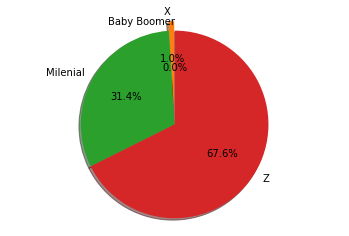

In [40]:
# Visualisasi Pie Chart DataFrame 1 - Sebaran dan Persentase Generasi pada Customer Restoran
labels = 'Baby Boomer', 'X', 'Milenial', 'Z'
sizes = [0.02, 0.97, 31.41, 67.69]
explode = (0, 0.1, 0, 0)  # hanya "meruncing" pada irisan ke-2 (yaitu 'X')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio memastikan bahwa pie chart digambar sebagai lingkaran.

plt.show()

In [41]:
# inisialisasi data dictionary 2
data2 = { 'gender' : ['Wanita', 'Pria'],
 'Jumlah Orang' : [3969, 5799],
 'Persentase' : [40.63, 59.37],
 }

Interpretasi: Dari hasil analisis data diatas, dapat diketahui bahwa generasi Z dan generasi Milenial mendominasi segmentasi demografi generasi *customer* di Restoran ini sementara, segmen minoritas dari generasi *customer* di Restoran ini berasal dari generasi X dan generasi Baby Boomer.

In [42]:
# converting dictionary to DataFrame 2 - Sebaran dan Persentase Gender pada Customer Restoran
df = pd.DataFrame(data2)
df

,gender,Jumlah Orang,Persentase
0,Wanita,3969,40.63
1,Pria,5799,59.37


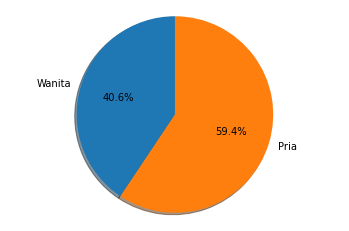

In [43]:
# Visualisasi Pie Chart DataFrame 2 - Sebaran dan Persentase Gender pada Customer Restoran
labels = 'Wanita', 'Pria'
sizes = [40.63, 59.37]
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') # Equal aspect ratio memastikan bahwa pie chart digambar sebagai lingkaran.

plt.show()

Interpretasi: Dari hasil analisis data diatas, dapat diketahui bahwa gender Pria mendominasi segmentasi demografi gender di Restoran ini sementara, segmen gender yang lebih kecil di Restoran ini berasal dari gender Wanita.

### Analisis Data untuk Menjawab *Problem Statement* Kedua

#### Pencarian Sebaran Data serta Pengelompokkannya

In [44]:
# Mencari sebaran data payment_mode di Restoran
pd.read_sql_query("""
                    SELECT 
                        payment_mode, COUNT (payment_mode)
                    FROM Orders
                    GROUP BY payment_mode
                  """, conn)

,payment_mode,COUNT (payment_mode)
0,1,7592
1,2,1600
2,3,92
3,4,455
4,5,29


#### Pembuatan Data Frame dan Visualisasi Data

In [45]:
# inisialisasi data dictionary 3
data3 = { 'payment_mode' : [1, 2, 3, 4, 5],
 'Jumlah payment_mode' : [7592, 1600, 92, 455, 29],
 'Persentase' : [77.72, 16.38, 0.94, 4.66, 0.30],
 }

In [46]:
# converting dictionary to DataFrame 3 - Sebaran dan Persentase Mode Pembayaran di Restoran
df = pd.DataFrame(data3)
df

,payment_mode,Jumlah payment_mode,Persentase
0,1,7592,77.72
1,2,1600,16.38
2,3,92,0.94
3,4,455,4.66
4,5,29,0.30


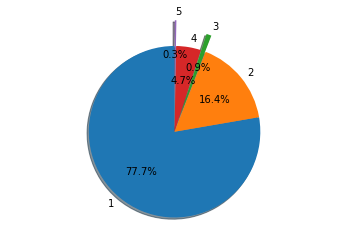

In [47]:
# Visualisasi Pie Chart DataFrame 3 - Sebaran dan Persentase Mode Pembayaran di Restoran
labels = '1', '2', '3', '4', '5'
sizes = [77.72, 16.38, 0.94, 4.66, 0.30]
explode = (0, 0, 0.2, 0, 0.3)  # hanya "meruncing" pada irisan ke-2 dan ke-5 (yaitu '2' dan '3')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio memastikan bahwa pie chart digambar sebagai lingkaran.

plt.show()

Interpretasi: Dari hasil analisis data diatas, dapat diketahui bahwa 2 mode pembayaran yang paling banyak digunakan oleh *customer* di Restoran ini adalah mode pembayaran 1 dengan persentase sebesar 77,7% dan mode pembayaran 2 dengan persentase sebesar 16,4%. Sisanya mode pembayaran 3, mode pembayaran 4, dan mode pembayaran 5 memiliki tingkat penggunaan yang lebih sedikit di kalangan *customer* di Restoran ini.

### Analisis Data untuk Menjawab *Problem Statement* Ketiga

#### Pencarian Sebaran Data serta Pengelompokkannya

In [48]:
# Mencari jumlah vendor yang biaya pengirimannya paling murah
pd.read_sql_query("""
                    SELECT 
                        delivery_charge, COUNT (delivery_charge)
                    FROM Vendors
                    GROUP BY delivery_charge
                  """, conn)

,delivery_charge,COUNT (delivery_charge)
0,0.0,41
1,0.7,59


#### Pembuatan Data Frame dan Visualisasi Data

In [49]:
# inisialisasi data dictionary 4
data4 = { 'delivery_charge' : [0.0, 0.7],
 'Jumlah delivery_charge' : [41, 59],
 'Persentase' : [41, 59],
 }

In [50]:
# converting dictionary to DataFrame 3 - Sebaran dan Persentase Biaya Pengiriman Vendor di Restoran
df = pd.DataFrame(data4)
df

,delivery_charge,Jumlah delivery_charge,Persentase
0,0.0,41,41
1,0.7,59,59


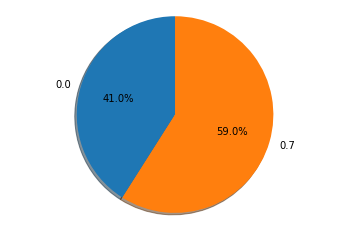

In [51]:
# Visualisasi Pie Chart DataFrame 3 - Sebaran dan Persentase Biaya Pengiriman Vendor di Restoran
labels = '0.0', '0.7'
sizes = [41, 59]
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Interpretasi: Dari hasil analisis data diatas, dapat diketahui terdapat sebanyak 41 vendor yang nilai biaya pengirimannya 0.0 sementara 59 vendor sisanya mematok biaya pengiriman sebesar 0.7

### Close Connection

In [52]:
# Menutup connection ke database apabila database telah selesai digunakan.
conn.close()

## DISCUSSION

#### 1.Segmentasi Pasar Demogafis dari Responden di Restoran ini
1.1. Segmentasi Generasi

Dari hasil analisis data, dapat diketahui bahwa generasi Z dan generasi Milenial mendominasi segmentasi demografi generasi *customer* di Restoran ini dengan besaran persentase secara berturut-turut 67,6% dan 31,4%. Disamping itu, segmen minoritas dari generasi *customer* di Restoran ini berasal dari generasi X dan generasi Baby Boomer dengan besaran persentase secara berturut-turut 0,97% dan 0,02%.

Hasil analisis data tersebut mendekati hasil penelitian Karo dan Hamonangan (2021) yang mana jumlah sampel responden Restoran di Kota Pagar Alam jika diakumulasikan menjadi berkisar 97 persen lebih adalah generasi Z dan generasi Milenial. Jika dicoba temukan irisannya, bahwa pada kedua generasi tersebut,sama-sama terdiri atas mayoritas individu yang sangat akrab dengan perkembangan teknologi, tentunya ini juga berdampak pada pola berwisata maupun pola konsumsi. 

Berbeda dengan generasi X dan Baby Boomer, Menurut Hensley (2000) dalam Tjandra, Nathania dan Kristanti (2015) konsumen dari kelompok usia tua cenderung bersantap di restoran sebagai kesempatan untuk bersosialisasi dengan keluarga maupun kerabat sembari menikmati suasana restoran yang didesain sesuai dengan tema atau konsep dari restoran tersebut.

1.2. Segmentasi Gender

Dari hasil analisis data, dapat diketahui gender Pria mendominasi segmentasi demografi gender di Restoran ini dengan persentase sebesar 59,4%. Reiboldt dalam Ngai *et al.* (2007) mengindikasikan bahwa *customer* Pria lebih memungkinkan untuk menyampaikan keluhannya dibandingkan dengan *customer* Wanita. Pihak Manajemen Restoran perlu sigap dan cepat dalam merespons keluhan dari *customer* Pria untuk meningkatkan kepuasan atas produk dan layanan dari Restoran namun, pihak Manajemen Restoran juga perlu mengimplementasikan survei sederhana menggunakan kotak kritik dan saran guna memfasilitasi keluhan dan meningkatkan kepuasan dari *customer* Wanita.

### **Contoh Gambar Kotak Kepuasan**
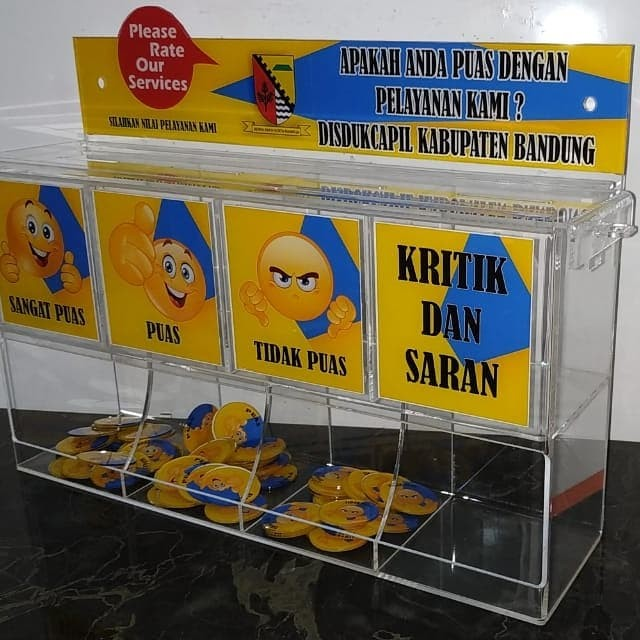

Sumber: kingsley_akrilik (tanpa tanggal)

#### 2.Mode Pembayaran pada Restoran Ini
Dari hasil analisis data , dapat diketahui bahwa 2 mode pembayaran yang paling banyak digunakan oleh *customer* di Restoran ini adalah mode pembayaran 1 dan mode pembayaran 2. Mode pembayaran 1 dan mode pembayaran 2 perlu mendapatkan perhatian khusus dan peningkatan kualitas layanannya.

Disamping itu restoran ini juga perlu mempertahankan dan me-*maintain* sisa 3 mode pembayaran lainnya sebab, hasil penelitian Purnama dan Pralina (2016) menunjukkan bahwa dari keputusan pembelian di Restoran The Centrum Bandung dipengaruhi oleh variabel pilihan produk, pilihan merek, pilihan penyalur, waktu pembelian, jumlah pembelian, dan metode pembayaran. Dimana metode pembayaran mendapatkan penilaian tertinggi karena memiliki keberagaman dalam pilihan pembayaran dan responden juga merasakan kemudahan saat melakukan pembayaran.


#### 3.Strategi *Procurement* yang Dapat Diimplementasikan pada Restoran Ini
Dari hasil analisis data, dapat diketahui terdapat sebanyak 41 vendor yang nilai biaya pengirimannya 0.0 sementara 59 vendor sisanya mematok biaya pengiriman sebesar 0.7. Berdasarkan Matriks Kraljic (Schmidt, tanpa tanggal a): 
- 41 vendor yang nilai biaya pengirimannya 0.0 ini termasuk dalam kategori *leverage supplier*. Tipe *leverage supplier* ini menghasilkan dampak keuangan yang tinggi namun risikonya rendah. Strategi *procurement* untuk vendor tipe *leverage supplier* adalah melakukan *competitive bidding* guna mengoptimalkan keuntungan bagi Restoran.
- 59 vendor sisanya yang mematok biaya pengiriman sebesar 0.7 termasuk dalam dalam kategori *strategic supplier* Tipe *strategic supplier* ini merupakan *supplier* yang berisiko tinggi dan berbiaya tinggi. Hal ini berlaku untuk *supplier* yang sangat diandalkan oleh perusahaan. Strategi *procurement* untuk vendor tipe *strategic supplier* adalah melakukan *partnership* guna mengoptimalkan keuntungan bagi Restoran.

### **Gambar Implementasi Empat Strategi Pengadaan dalam Kraljic’s Portfolio Purchasing Model**

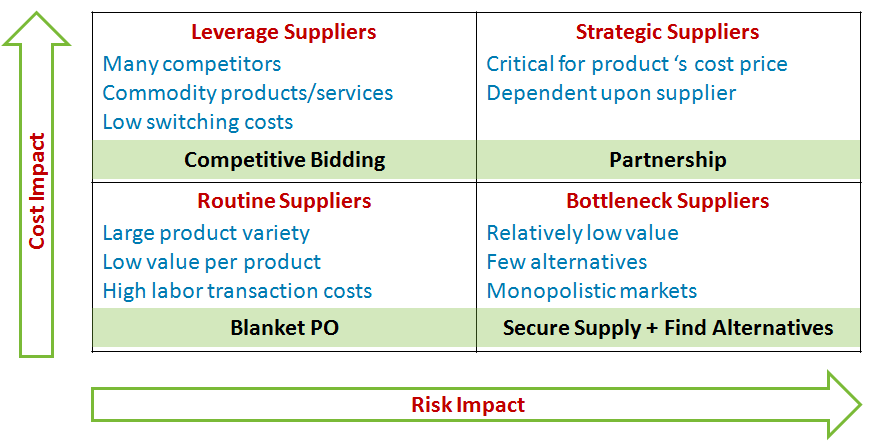

Sumber: Sumber: Schmidt (tanpa tanggal b)

## REKOMENDASI

#### 1.Rekomendasi Terkait Segmentasi Demografis
1.1.Rekomendasi Terkait Segmentasi Demografis Generasi

- *Customer* generasi Z dan Milenial tersebut,sama-sama terdiri atas mayoritas individu yang sangat akrab dengan perkembangan teknologi, tentunya ini juga berdampak pada pola berwisata maupun pola konsumsi. Generasi Z dan generasi Milenial mendominasi segmentasi demografi generasi *customer* di Restoran ini dengan besaran persentase secara berturut-turut 67,6% dan 31,4%. Oleh itu saya merekomendasikan bagi Pihak Manajemen Restoran ini untuk membangun *e-commerce* usaha restoran, cara paling sederhana adalah melakukan kolaborasi dengan *platform online* yang telah beroperasional terlebih dahulu. Strategi ini digunakan untuk memperkecil *gap* antara perusahaan dengan target pasar restoran (Karo dan Hamonangan, 2021).
- Dalam melayani dan meningkatkan kepuasan bagi segmen *customer* minoritas yaitu generasi X dan Baby Boomer, menurut Hensley (2000) dalam Tjandra, Nathania dan Kristanti (2015) perlu didesain suasana restoran yang sesuai dengan tema atau konsep dari restoran tersebut yang akan digunakan untuk bersosialisasi dengan keluarga maupun kerabat.

1.2.Rekomendasi Terkait Segmentasi Demografis Gender

- Saya merekomendasikan bagi Pihak Manajemen Restoran agar sigap dan cepat dalam merespons keluhan dari *customer* Pria untuk meningkatkan kepuasan atas produk dan layanan dari Restoran.
- Pihak Manajemen Restoran juga perlu mengimplementasikan survei sederhana menggunakan kotak kritik dan saran guna memfasilitasi keluhan dan meningkatkan kepuasan dari *customer* Wanita yang pola perilakunya lebih pasif dalam menyampaikan keluhan atas suatu produk dan layanan.

#### 2.Rekomendasi Terkait Mode Pembayaran
Menurut Wood (2017) pada waktu atau tempat pembelian, *customer* mungkin memerlukan bantuan dalam menguji produk, melengkapi dokumen untuk transaksi, mengatur pengiriman atau pengambilan, mengatur metode atau persyaratan pembayaran, memanfaatkan promosi yang berhubungan dengan pembelian, atau *purchase-related service tasks*. Sehingga untuk meningkatan kepuasan *customer* Restoran ini perlu melakukan inovasi, mengoptimalkan, dan menambah mode pembayaran di Restoran ini. Disamping itu, mode pembayaran 1 dan mode pembayaran 2 di Restoran ini juga perlu mendapatkan perhatian khusus dan peningkatan kualitas layanannya.

#### 3.Rekomendasi terkait Strategi *Procurement* yang Dapat Diimplementasikan pada Restoran Ini
Saya merekomendasikan strategi *procurement* bagi Restoran sebagai berikut:
- Strategi *procurement* untuk 41 vendor yang nilai biaya pengirimannya 0.0 (vendor bertipe *leverage supplier*) adalah melakukan *competitive bidding* guna mengoptimalkan keuntungan bagi Restoran.
- Strategi *procurement* untuk 59 vendor sisanya yang mematok biaya pengiriman sebesar 0.7 (vendor bertipe *strategic supplier*) adalah dengan melakukan *partnership* guna mengoptimalkan keuntungan bagi Restoran.

## KESIMPULAN - Create the story

Dari hasil analisis deskriptif pada data, dapat diketahui bahwa: 
- Generasi Z dan generasi Milenial mendominasi segmentasi demografi generasi *customer* di Restoran ini sementara, segmen minoritas dari generasi *customer* di Restoran ini berasal dari generasi X dan generasi Baby Boomer.
- Gender Pria mendominasi segmentasi demografi gender di Restoran ini sementara, segmen gender yang lebih kecil di Restoran ini berasal dari gender Wanita.
- 2 mode pembayaran yang paling banyak digunakan oleh *customer* di Restoran ini adalah mode pembayaran 1 dengan persentase sebesar 77,7% dan mode pembayaran 2 dengan persentase sebesar 16,4%. Sisanya mode pembayaran 3, mode pembayaran 4, dan mode pembayaran 5 memiliki tingkat penggunaan yang lebih sedikit di kalangan *customer* di Restoran ini.
- Terdapat sebanyak 41 vendor bertipe *leverage supplier* yang nilai biaya pengirimannya 0.0 sementara 59 vendor sisanya mematok biaya pengiriman sebesar 0.7 merupakan vendor bertipe *strategic supplier*.

Hasil analisis deskriptif tersebut tentunya perlu diformulasikan dengan tepat agar menghasilkan kebijakan bisnis yang menguntungkan. Penyusun telah menguraikan pembahasan dan rekomendasi strategi bisnis berdasarkan hasil *exploratory data* pada bagian sebelumnya. Pihak restoran diharapkan dapat segera mengimplementasikan kebijakan dari hasil analisis, pembahasan, dan rekomendasi penyusun pada *capstone project *ini guna mendapatkan manfaat bisnis yang optimal.

## REFERENSI

Adi, D. E. dan Pujotomo, D. (2017) “Penggunaan Kraljic ’ s Purchasing Portfolio Model Dalam Perancangan Strategi Pengadaan Bahan Baku Pada PT Masscoom Graphy,” *Ejournal Undip,* 6(3). Tersedia pada: https://ejournal3.undip.ac.id/index.php/ieoj/article/viewFile/16857/16192.

Karo, P. K. dan Hamonangan, S. (2021) “Analisis Strategi Pemasaran Restoran Menghadapi Masa Pandemi Covid 19 Di Kota Pagar Alam,” *Jurnal Sains Sosio Humaniora,* 5(1), hal. 396–408. doi: 10.22437/jssh.v5i1.14152.

kingsley_akrilik (tanpa tanggal) “kotak saran 4skat + tempat koin.” Kebumen: Tokopedia. Tersedia pada: https://www.tokopedia.com/kingsleyakrilik/kotak-saran-4skat-tempat-koin.

Kotler, P. dan Keller, K. L. (2012) *Marketing Management.* 14 ed. Diedit oleh S. Yagan et al. Bergen: Prentice Hall.

Kotler, P. dan Keller, K. L. (2016) *Marketing Management: Global Edition.* 15 ed. Diedit oleh S. Wall et al. Harlow: Pearson Education Limited.

Mind Tools Content Team (tanpa tanggal) *The Kraljic Portfolio Purchasing Model Assessing Risk and Maximizing Profits, MindTools.* Tersedia pada: https://www.mindtools.com/pages/article/newSTR_49.htm (Diakses: 10 Desember 2021).

Ngai, E. W. T. et al. (2007) “Consumer complaint behaviour of Asians and non-Asians about hotel services: An empirical analysis,” *European Journal of Marketing,* 41(11–12), hal. 1375–1391. doi: 10.1108/03090560710821224.

Purnama, R. dan Pralina, A. R. (2016) “Pengaruh Direct Marketing Terhadap Keputusan Pembelian Di Restoran the Centrum Bandung,” *THE Journal : Tourism and Hospitality Essentials Journal,* 6(1), hal. 973. doi: 10.17509/thej.v6i1.2008.

Schmidt, T. (tanpa tanggal a) “Figure 1 Kraljic’s Portfolio Purchasing Model.” ProcureWare. Tersedia pada: https://www.procureware.com/suppliers-management-strategies/.

Schmidt, T. (tanpa tanggal b) “Figure 2 Applying the four procurement strategies in Kraljic’s Portfolio Purchasing Model.” ProcureWare. Tersedia pada: https://www.procureware.com/suppliers-management-strategies/.

Tjandra, C., Nathania, C. dan Kristanti, M. (2015) “Analisa Meal Experience dan Pengaruhnya Terhadap Minat Beli Ulang di Restoran Jepangdi Surabaya,” *Hospitality dan Manajemen Jasa,* 3(1), hal. 66–81. Tersedia pada: http://publication.petra.ac.id/index.php/manajemen-perhotelan/article/view/2829.

Wijaya, S. dan Chandra, G. A. (2006) “Analisa Segmentasi Penentuan Target Dan Posisi Pasar Pada Restoran Steak Dan Grill Di Surabaya,” *Jurnal Manajemen Perhotelan,* 2(2), hal. 76–85. Tersedia pada: http://puslit2.petra.ac.id/ejournal/index.php/hot/article/view/16513.

Wood, M. B. (2017) *Essential Guide to Marketing Planning.* 4 ed. Harlow: Pearson Education Limited.
